In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df['Cabin'].isnull().sum()/df['Cabin'].shape

array([0.77104377])

Since null values in Age column was 177, so I filled it with mean pf age's but null values in cabin is 687 which is almost 77% data is missing, so we will not consider this column for building our model

In [18]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Since name of the person can't decide about his survival, so we can remove it. and encode the column Sex,ticket

In [49]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Univariate Analysis

First, we will only analyze the independent features. We will try to plot the categorical and the numerical distributions and will try to learn something from them. Once we are done with this, bivariate and multivariate will be easier as we will have more intuition of the data.

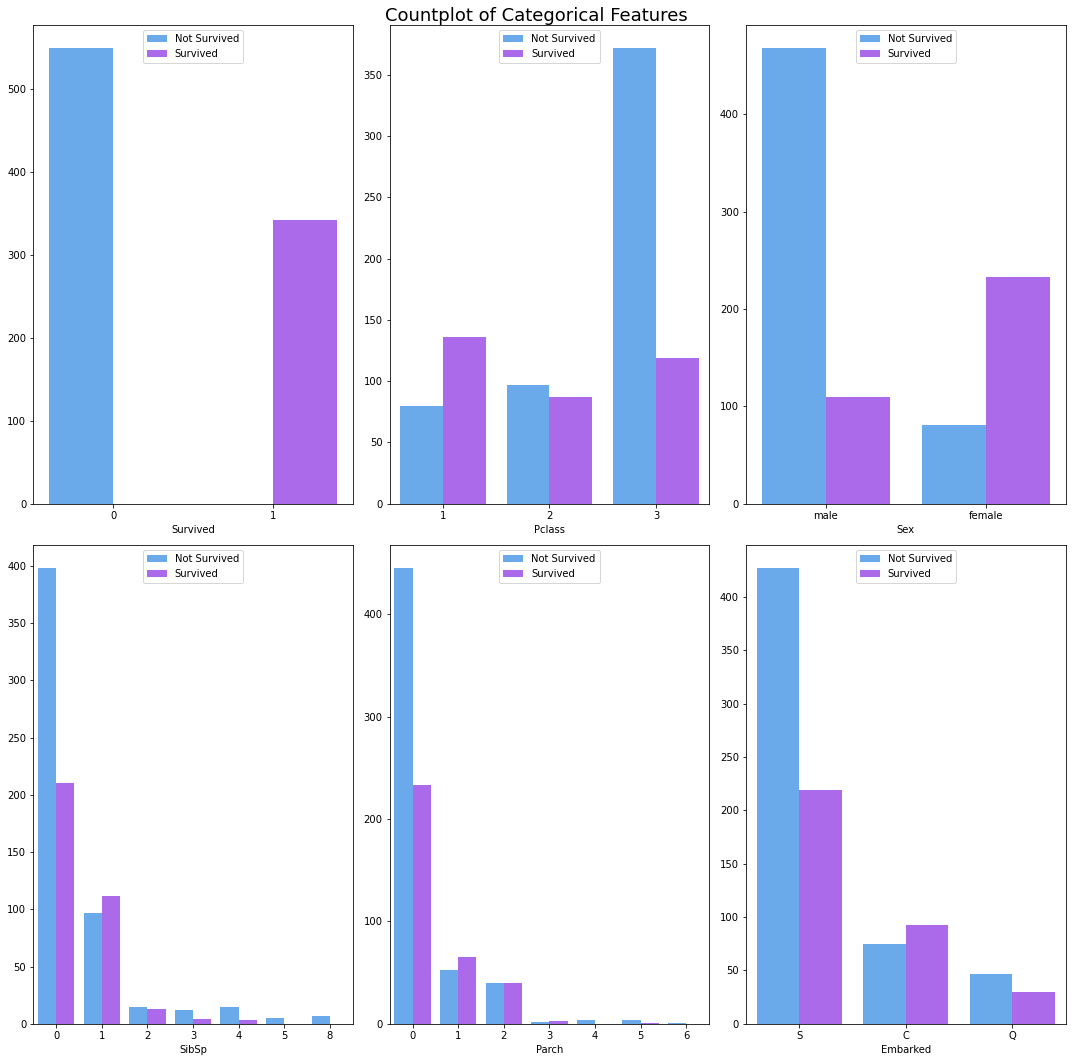

In [20]:
countfeature = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
countlist = list(enumerate(countfeature))

plt.figure(figsize = (15,15))
plt.suptitle("Countplot of Categorical Features", fontsize=18)
for i in countlist: 
    plt.subplot(2,3,i[0]+1)
    sns.countplot(data = df, x = i[1], hue = "Survived", palette="cool")
    plt.ylabel("")
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.tight_layout()
plt.show()

These figures show the actual distribution of male and female passengers that survived and did not survive. Female passengers have survived at a much better rate than male passengers.

It is clear that,The survival of the people belong to 3rd class is very least. It looks like ...

Most of the first class passengers survived titanic tragedy, while almost half of second class and only few of third class passenger survived.

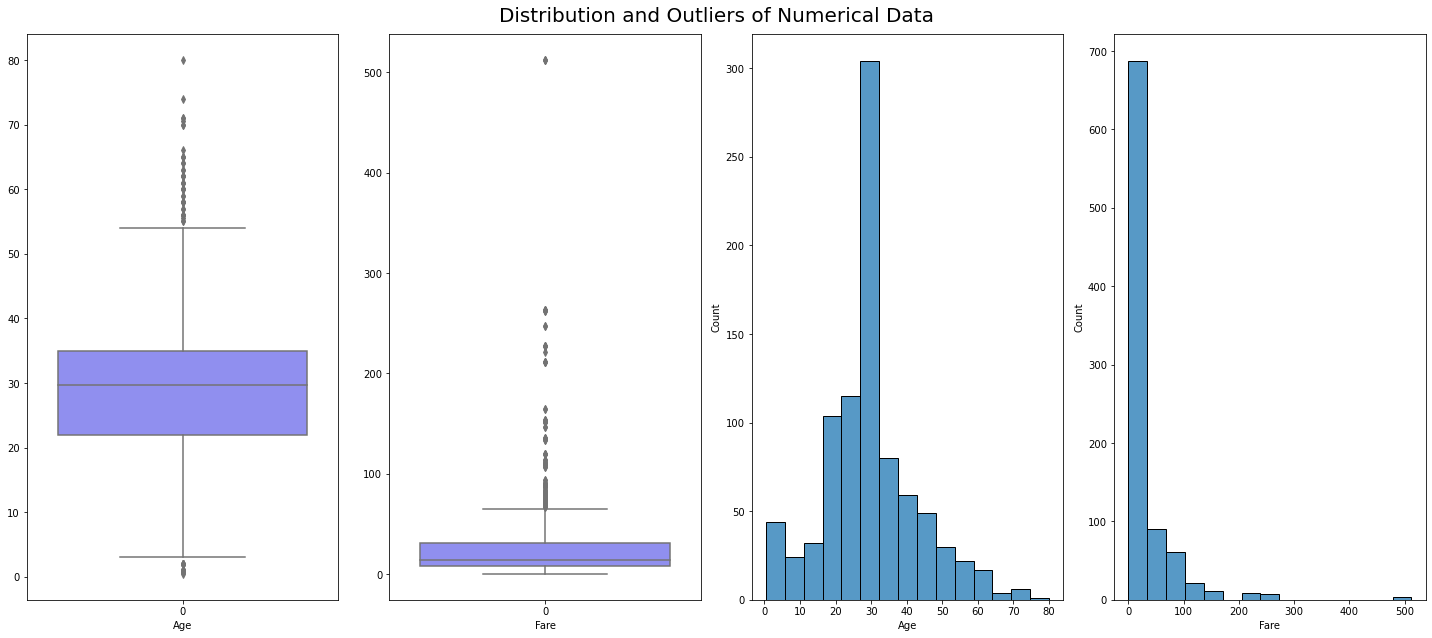

In [50]:
numfeature = ["Age", "Fare"]
enumfeat = list(enumerate(numfeature))

plt.figure(figsize=(20,9))
plt.suptitle("Distribution and Outliers of Numerical Data", fontsize=20)
for i in enumfeat:
    plt.subplot(1,4,i[0]+1)
    sns.boxplot(data = df[i[1]], palette="cool")
    plt.xlabel(str(i[1]))
for i in enumfeat:
    plt.subplot(1,4,i[0]+3)
    sns.histplot(data = df[i[1]], palette="cool", bins=15)
    plt.xlabel(str(i[1]))
plt.tight_layout()
plt.show()

We can see there are outliers in tha data.

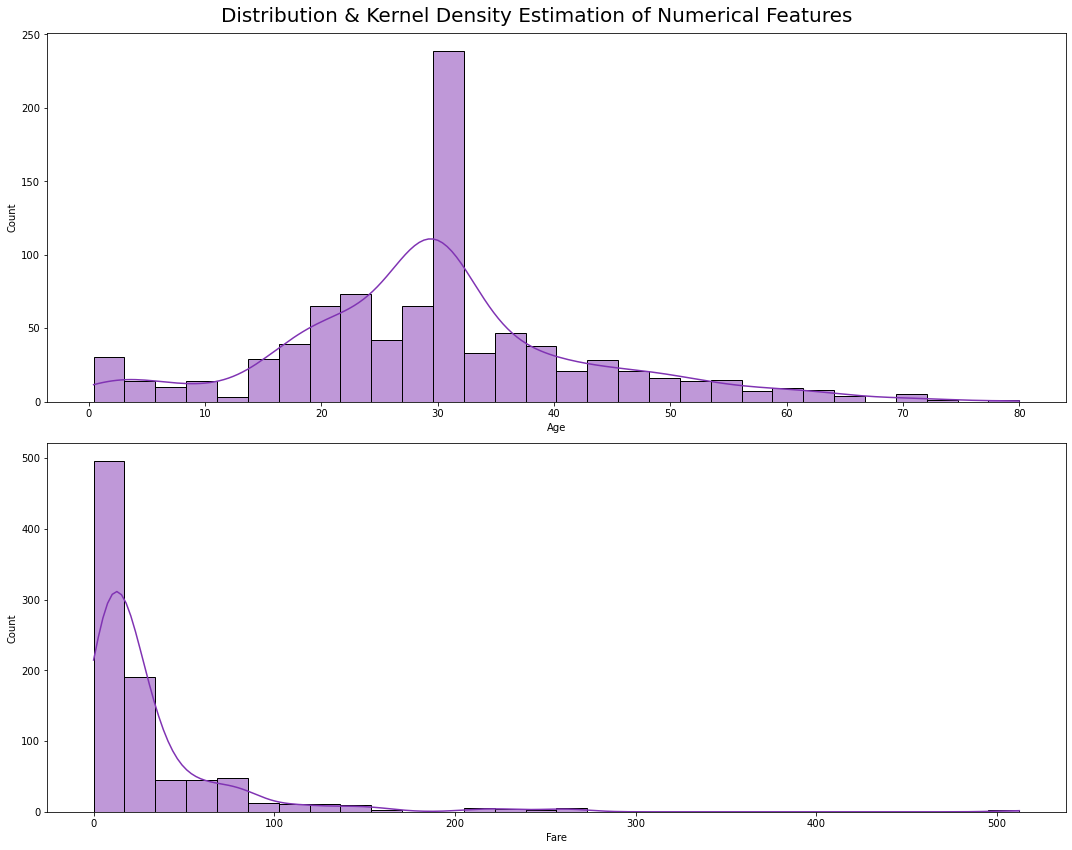

In [22]:
plt.figure(figsize=(15,12))
plt.suptitle("Distribution & Kernel Density Estimation of Numerical Features", fontsize=20)
for i in enumfeat:
    plt.subplot(2,1,i[0]+1)
    sns.histplot(x = df[i[1]], kde=True, bins=30, color=(0.50,0.20,0.70))
plt.tight_layout()
plt.show()

### Bivariate and Multivariate Analysis

Now, as we have a intuition of the independent variable, we will try to learn something new from analysing the relationship between these individual variables and how they are correlated. This will help us in feature engineering and further in selecting an appropriate model for the inference of test data.

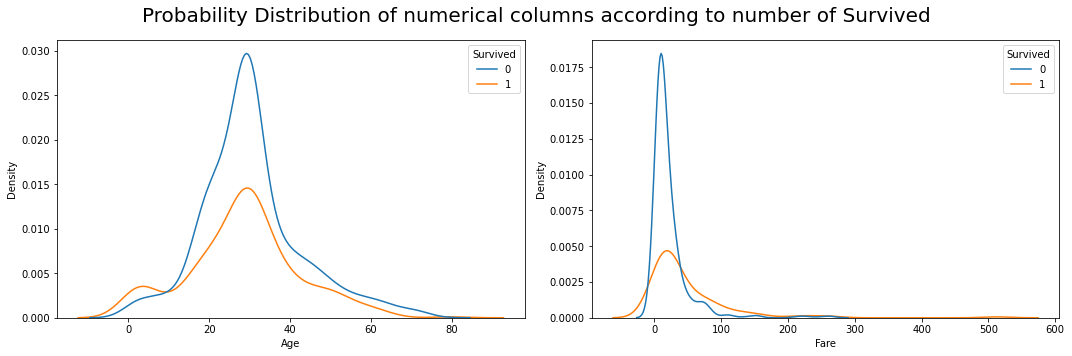

In [23]:
plt.figure(figsize=(15,5))
plt.suptitle("Probability Distribution of numerical columns according to number of Survived", fontsize = 20)
for i in enumfeat:
    plt.subplot(1,2,i[0]+1)
    sns.kdeplot(data=df, x=i[1], hue="Survived")
plt.tight_layout()
plt.show()

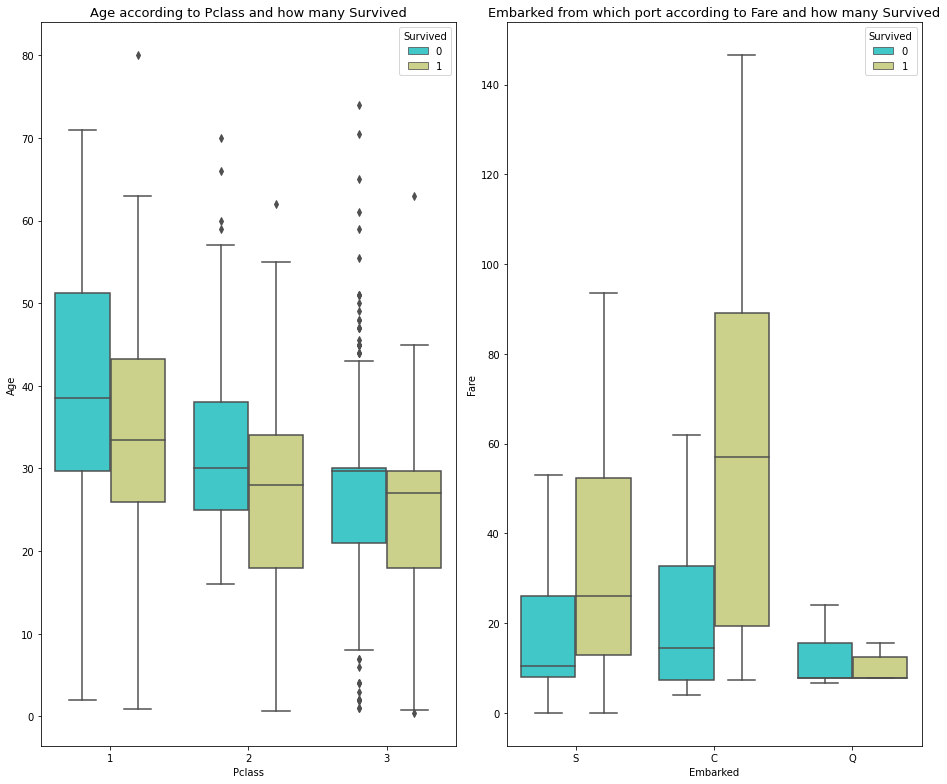

In [24]:
plt.figure(figsize=(13,11))

plt.subplot(1,2,1)
plt.title("Age according to Pclass and how many Survived", fontsize=13)
sns.boxplot(data = df, y ="Age", x ="Pclass", hue="Survived", palette="rainbow")

#Two extreme outliers were ruining the boxplot on the right. Showfliers parameter has been used to remove the outliers of Fare. 
plt.subplot(1,2,2)
plt.title("Embarked from which port according to Fare and how many Survived", fontsize=13)
sns.boxplot(data = df, y ="Fare", x ="Embarked", hue="Survived", palette="rainbow", showfliers=False)

plt.tight_layout()
plt.show()

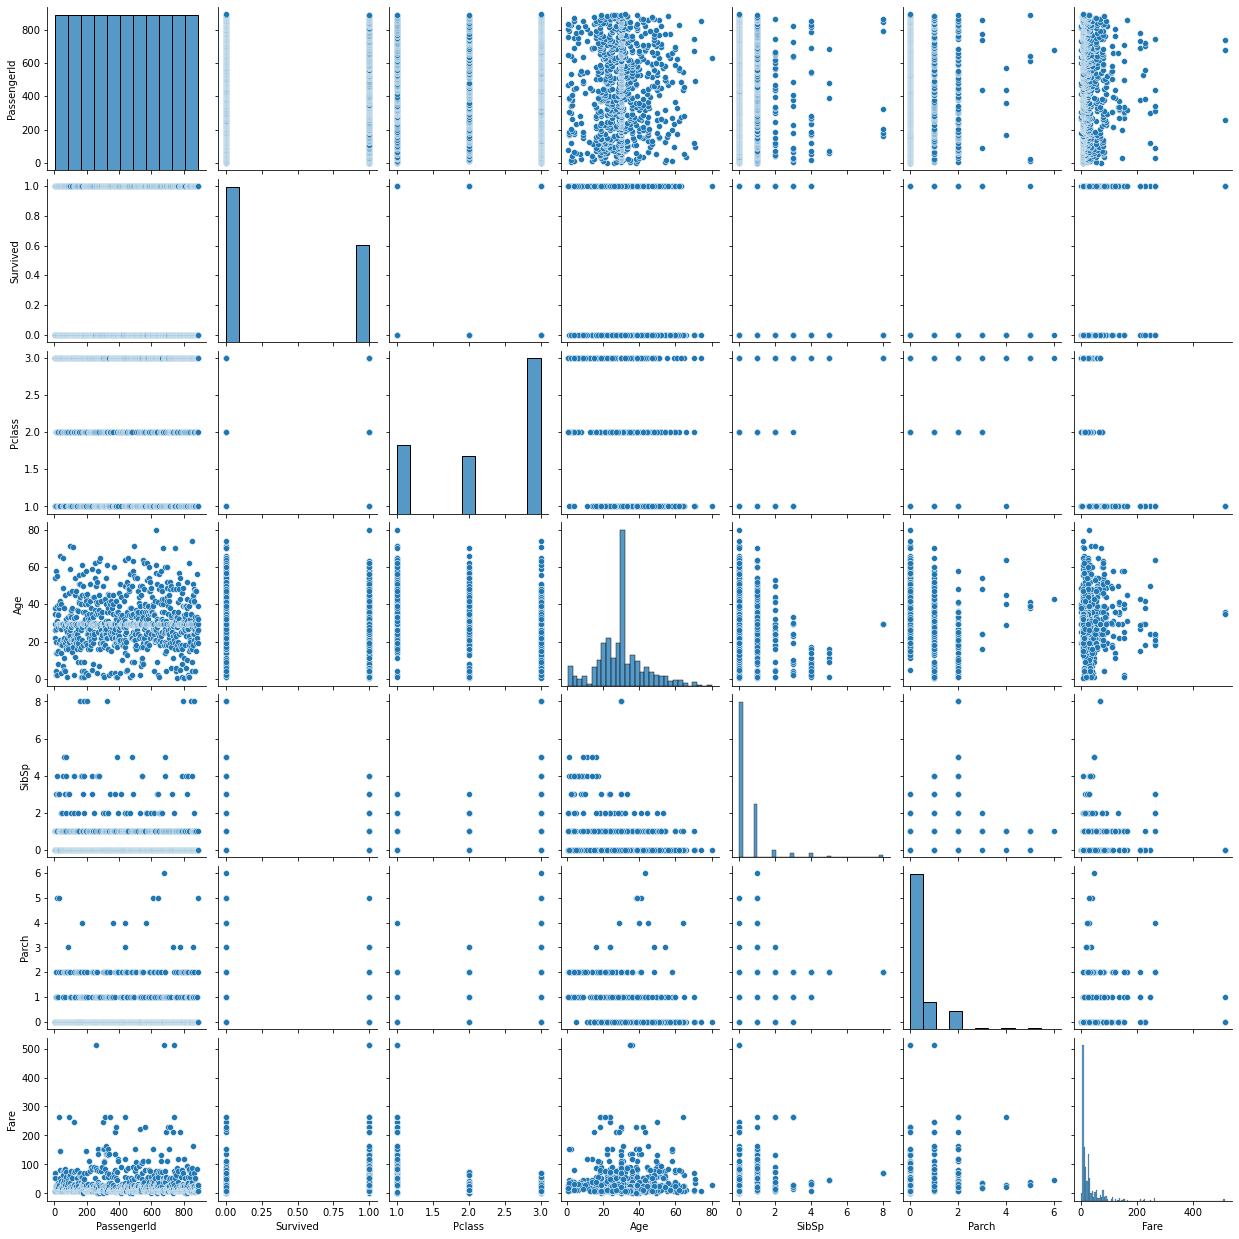

In [25]:
sns.pairplot(df)

In [26]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [51]:
df1=df.drop(['Ticket','Name','PassengerId','Cabin'],axis=1)

Name, Ticket, PassengerId are not required to predict the survival so we drop these columns

In [52]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [53]:
#Encoding for Embarked Column also
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Embarked'] = le.fit_transform(df1['Embarked'])

In [54]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [55]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [56]:
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

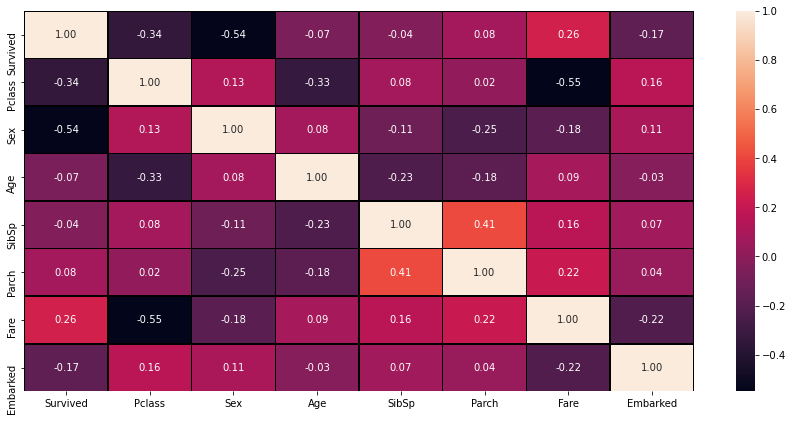

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='0.2f')

Positive Correlation Features:

Fare and Survived: 0.26. There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive.

Negative Correlation Features:

Fare and Pclass: -0.55 This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3).

Gender and Survived: -0.54 Basically is the info of whether the passenger was male or female. Pclass and Survived: -0.34

([<matplotlib.axis.XTick at 0x277f61af9a0>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

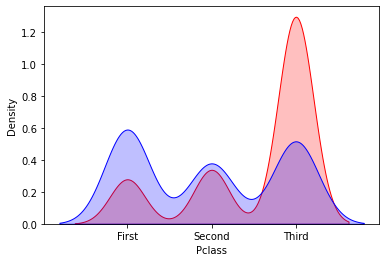

In [57]:
plt.subplots()
sns.kdeplot(df1.loc[(df1['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(df1.loc[(df1['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df1.Pclass.unique()),labels)

First class passenger had the upper hand during the tragedy than second and third class passengers.

Text(0.5, 0, 'Fare')

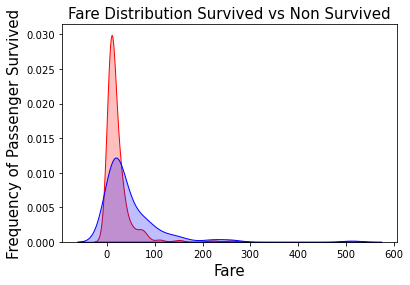

In [58]:
plt.subplots()

ax=sns.kdeplot(df1.loc[(df1['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(df1.loc[(df1['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=15)
plt.ylabel('Frequency of Passenger Survived',fontsize=15)
plt.xlabel('Fare',fontsize=15)

### Checking Outliers


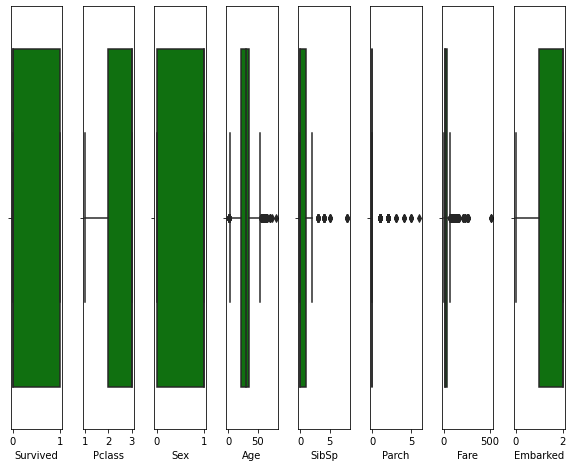

In [59]:
collist=df1.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='green',orient='h')
    plt.tight_layout()    #fits all graphs in one single format

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [61]:
len(np.where(z>3)[0])

72

In [66]:
z.iloc[863]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [67]:
#to drop Outliers;
df_new=df1[(z<3).all(axis=1)]
print("old dataFrame",df1.shape)
print("new dataFrame",df_new.shape)
print("total dropped rows",df1.shape[0]-df_new.shape[0])

old dataFrame (891, 8)
new dataFrame (820, 8)
total dropped rows 71


#### Percentage Data Loss

In [68]:
loss_percent=(df1.shape[0]-df_new.shape[0])/df1.shape[0]*100
print(loss_percent,'%')

7.968574635241302 %


#### To Check Skewness

In [71]:
df_new.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [72]:
x=df_new.drop("Survived",axis=1)
y=df_new["Survived"]

In [73]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [74]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

<function matplotlib.pyplot.show(close=None, block=None)>

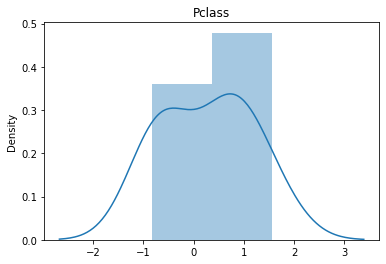

In [75]:
sns.distplot(x[0])
plt.title("Pclass")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

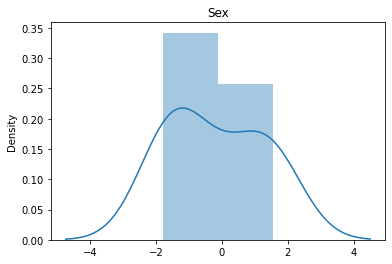

In [76]:
sns.distplot(x[1])
plt.title("Sex")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

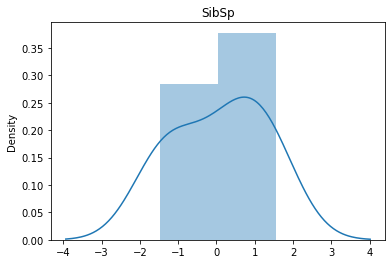

In [77]:
sns.distplot(x[3])
plt.title("SibSp")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

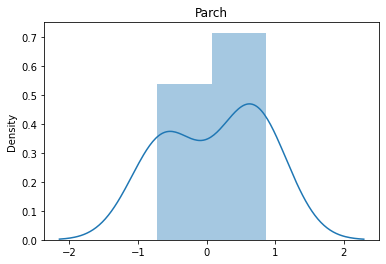

In [78]:
sns.distplot(x[4])
plt.title("Parch")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

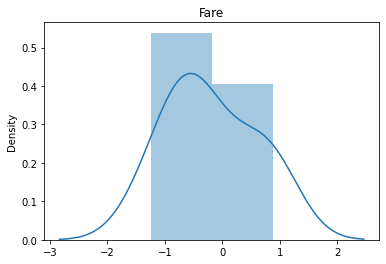

In [79]:
sns.distplot(x[5])
plt.title("Fare")
plt.show

Skewness is removed now, we can proceed with modelling

### Finding Best Random State

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8658536585365854 on Random_State 14


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=14)

### Running Different Algorithms

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

Running all the models and checking their accuracy and cross validation score. The model with least difference between Cross Validation and Accuracy Score is our best model

In [83]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print('\n')

Accuracy score: of LogisticRegression()
0.8658536585365854
[[84  7]
 [15 58]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        91
           1       0.89      0.79      0.84        73

    accuracy                           0.87       164
   macro avg       0.87      0.86      0.86       164
weighted avg       0.87      0.87      0.86       164

Cross Validation Score: 0.7914634146341463
Difference Between Accuracy Score and CrossValidation Score: 0.07439024390243909


Accuracy score: of SVC()
0.8658536585365854
[[88  3]
 [19 54]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        91
           1       0.95      0.74      0.83        73

    accuracy                           0.87       164
   macro avg       0.88      0.85      0.86       164
weighted avg       0.88      0.87      0.86       164

Cross Validation Score: 0.8134146341463415
Difference Between Accuracy Score an

As Difference Between Accuracy Score and CrossValidation Score is least for knn classifier, therefore it is our best model

### Hyper Parameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

grid_knn = GridSearchCV(knn, param_grid = hyperparameters, cv = 5)
grid_knn.fit(x,y)

best_params = grid_knn.best_params_
best_score = grid_knn.best_score_

print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.8146341463414635


In [85]:
knn1=KNeighborsClassifier(algorithm ='brute', n_neighbors= 5, p= 2, weights= 'uniform')
knn1.fit(x_train,y_train)
predknn1=knn1.predict(x_test)
print('Accuracy score: of',knn1)
acc=accuracy_score(y_test,predknn1)
print(acc)
print(confusion_matrix(y_test,predknn1))
print(classification_report(y_test,predknn1))

Accuracy score: of KNeighborsClassifier(algorithm='brute')
0.8475609756097561
[[83  8]
 [17 56]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        91
           1       0.88      0.77      0.82        73

    accuracy                           0.85       164
   macro avg       0.85      0.84      0.84       164
weighted avg       0.85      0.85      0.85       164



### ROC AUC

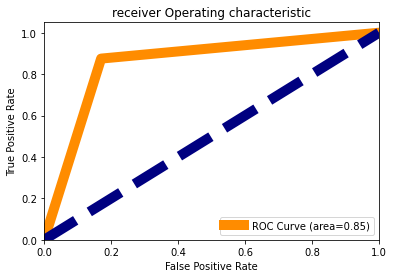

In [86]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predknn1,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('receiver Operating characteristic')
plt.legend(loc="lower right")
plt.show()
#Blue line is base model and accuracy of this model is 0.5 or 50%, orange is random model.So the trained model should have accuracy more than .5.


The score is good so we can save our model.

### Model Saving

In [87]:
import pickle
filename='Titanic.pkl'
pickle.dump(knn1,open(filename,'wb'))

### Conclusion

In [88]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predknn1},index=range(len(a)))
df_com

,original,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
159,1,1
160,1,1
161,0,0
162,0,0
